# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [14]:
%matplotlib inline
import pandas as pd
import seaborn as sns

filename = "../../assets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

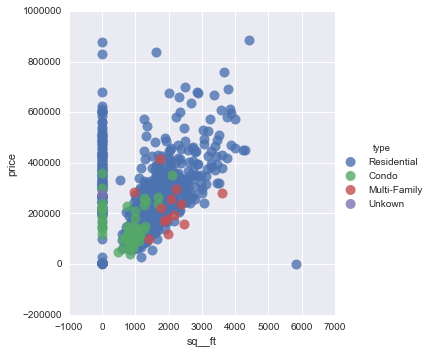

In [15]:
#data.plot.scatter(x='sq__ft',y='price')

sns.lmplot('sq__ft', 'price', data=data, fit_reg=False, hue="type", scatter_kws={"marker": "D", "s": 100})

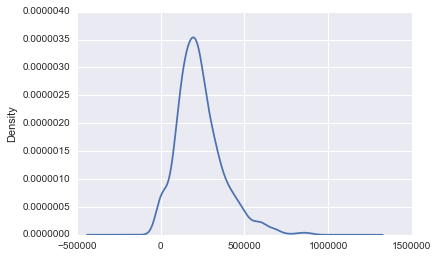

In [16]:
data['price'].plot.density()

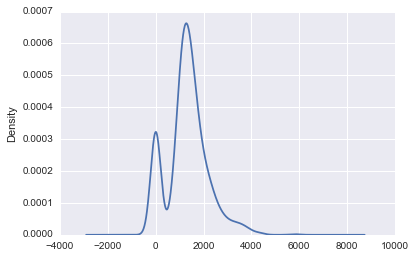

In [17]:
data['sq__ft'].plot.density()

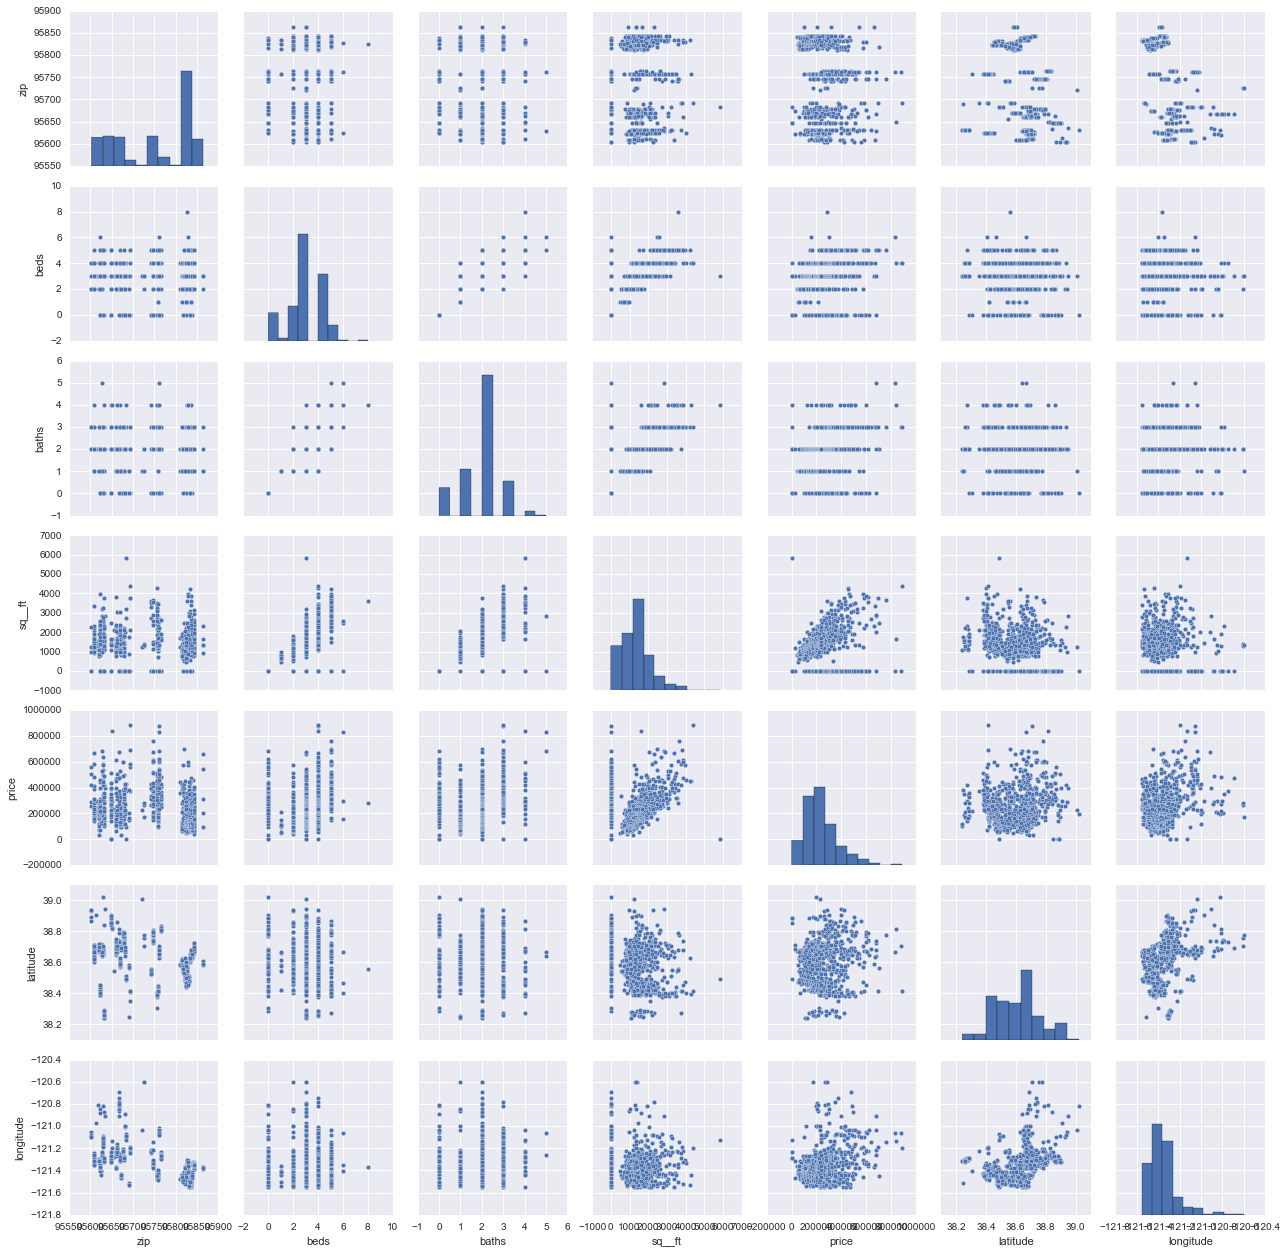

In [18]:
sns.pairplot(data)

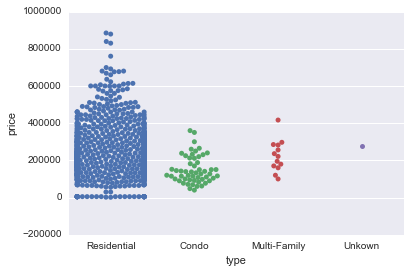

In [19]:
sns.swarmplot(x='type',y='price',data=data)

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

In [20]:
#import seaborn as sns
from matplotlib import pyplot as plt

#x = data['variable-name']
#y = data['price']

#plt.scatter(x, y)
#plt.xlabel("Appropriate Axis Label")
#plt.ylabel("Property Price")
#plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [21]:
from sklearn import linear_model
import statsmodels.api as sm

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [25]:
data = data.dropna()
data = data.where(data["sq__ft"] > 0)
#data['sq__ft'].sort_values(inplace=False)


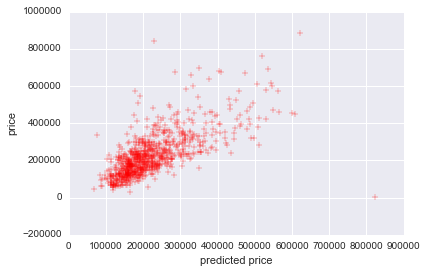

MSE: 7574596958.28


In [26]:
from sklearn.metrics import mean_squared_error

y = data["price"]
X = data["sq__ft"]

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("predicted price")
plt.ylabel("price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

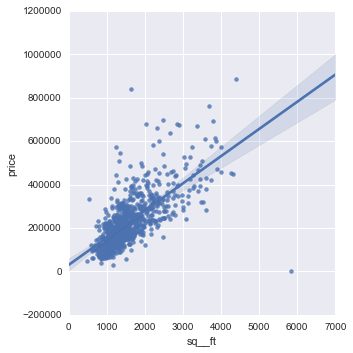

In [27]:
sns.lmplot('sq__ft','price',data)

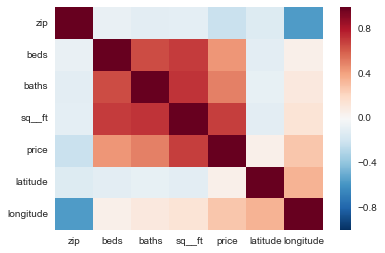

In [28]:
sns.heatmap(data.corr())

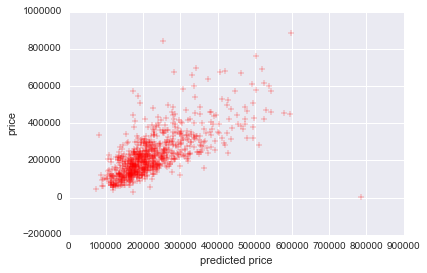

MSE: 7534131723.91


In [29]:
y = data["price"]
X = data[["sq__ft","beds","baths"]]

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("predicted price")
plt.ylabel("price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)